# Spotify Dataset Exploratory Data Analysis (EDA)

### Introduction

**In this Kernel, I explore how audio features and song elements have an effect on popularity. I also analyze the ways in which specific song characteristics (such as song length and sound features) have altered overtime.**

### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [2]:
data = pd.read_csv("/Users/vaishnavi/Downloads/data/data.csv")
genre_data = pd.read_csv("/Users/vaishnavi/Downloads/data/data_by_genres.csv")
year_data = pd.read_csv("/Users/vaishnavi/Downloads/data/data_by_year.csv")

### Read Data

**Using the .info() method to analyze the types of each column and check for any missing values in all three datasets. With no missing values, no columns have to be dropped. The .head() and .tail() methods provide the first 5 and last 5 rows, correspondingly.**

In [3]:
print(data.info())
print(genre_data.info())
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
data.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [5]:
data.tail()

valence  year  acousticness  \
170648    0.608  2020       0.08460   
170649    0.734  2020       0.20600   
170650    0.637  2020       0.10100   
170651    0.195  2020       0.00998   
170652    0.642  2020       0.13200   

                                                  artists  danceability  \
170648  ['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...         0.786   
170649                                       ['Ashnikko']         0.717   
170650                                        ['MAMAMOO']         0.634   
170651                                         ['Eminem']         0.671   
170652                              ['KEVVO', 'J Balvin']         0.856   

        duration_ms  energy  explicit                      id  \
170648       301714   0.808         0  0KkIkfsLEJbrcIhYsCL7L5   
170649       150654   0.753         0  0OStKKAuXlxA0fMH54Qs6E   
170650       211280   0.858         0  4BZXVFYCb76Q0Klojq4piV   
170651       337147   0.623         1  5SiZJoLXp3WOl3J4C8IK0d   
170652       189507   0.721         1  7HmnJHfs0BkFzX4x8j0hkl   

        instrumentalness  key  liveness  loudness  mode  \
170648          0.000289    7    0.0822    -3.702     1   
170649          0.000000    7    0.1010    -6.020     1   
170650          0.000009    4    0.2580    -2.226     0   
170651          0.000008    2    0.6430    -7.161     1   
170652          0.004710    7    0.1820    -4.928     1   

                                   name  popularity release_date  speechiness  \
170648                            China          72   2020-05-29       0.0881   
170649      Halloweenie III: Seven Days          68   2020-10-23       0.0605   
170650                              AYA          76   2020-11-03       0.0809   
170651                         Darkness          70   2020-01-17       0.3080   
170652  Billetes Azules (with J Balvin)          74   2020-10-16       0.1080   

          tempo  
170648  105.029  
170649  137.936  
170650   91.688  
170651   75.055  
170652   94.991

### Understanding the Data through Vizualization

**A general understanding of music production over the years is grasped through a count plot of the number of songs by the decade.**

In [6]:
# function that provides corresponding decade of year
def decade_of_year(year):
    period = int(year/10) * 10
    return str(period) + "s"

Text(0, 0.5, 'Count of Songs')

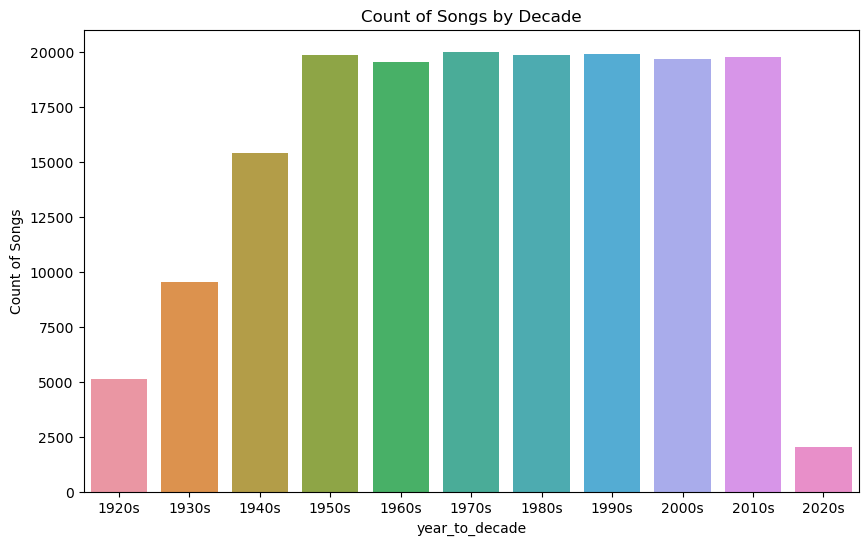

In [7]:
# Add a column the data set that has the corresponding decade of the year
data['year_to_decade'] = data['year'].apply(decade_of_year)

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Count of Songs by Decade")

# Count chart showing counts of songs released every decade since the 1920s
sns.countplot(x=data['year_to_decade'])

# Add label for vertical axis
plt.ylabel("Count of Songs")

**It is evident that music production grew drastically and linearly from the 1920s until the 1950s and leveled off soon after. The data for the 2020s decade is much lower than the rest of the data as we are early into the 2020s.**

***

**The enhanced box plot below checks for any strong outliers in popularity when grouped by decades.**

<AxesSubplot:xlabel='popularity', ylabel='year_to_decade'>

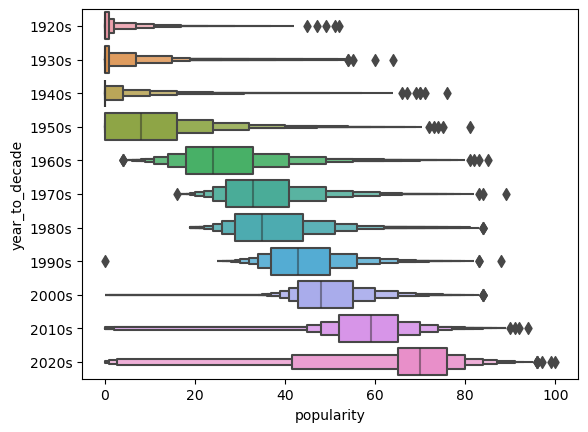

In [8]:
sns.boxenplot(data=data, x="popularity", y="year_to_decade")

**There are visible strong outliers that can be reasoned for as hits of the decades as they are far from the mean and the quantiles on the right end. Outliers on the far left of the ehanced box plots are songs that never picked up, largely differing from the rest of the songs in their decade. Further exploration and vizualization below aims to provide understanding for the drastic variation in popularity.**

***

**The average popularity of the entire dataset is calculated to be compared to the average popularity of explicit songs and the average popularity of clean songs. This helps reason for whether or not explicitness contributes to popularity.**

In [9]:
# Average is calculated
avg_pop = (data.popularity.sum() / data.popularity.value_counts().sum())

avg_pop

31.431794342906365

In [10]:
# New data frame with only explicit songs
df1=data[data['explicit']==1]

# Average is calculated
df1_avg_pop = (df1.popularity.sum() / df1.popularity.value_counts().sum())

df1_avg_pop

45.186170581306726

In [11]:
# New data frame with only clean songs
df2=data[data['explicit']==0]

# Average is calculated
df2_avg_pop = (df2.popularity.sum() / df2.popularity.value_counts().sum())

df2_avg_pop

30.161042120087057

**The average popularity value of explicit songs is significantly greater than average popularity value of both the entire dataset and clean music. However, this does not prove immediate correlation but encourages further exploration.**

***

**The pairplot below provides further vizualtions, comparing sound features (and the other columns in the dataset) with the popularity value, while taking into account explicitness through the color of the data point. Blue represents clean music, while orange represents explicit music.**

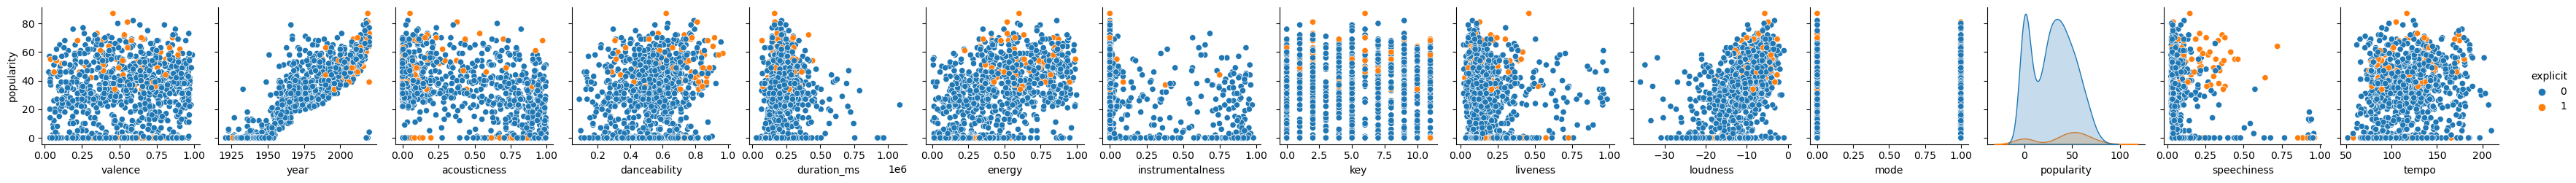

In [12]:
# Pairplot showing the relationship between all of the columns in the data table and popularity
sns.pairplot(data.sample(1000), y_vars = ["popularity"], hue="explicit")

**It can be seen that no matter the vizualization, the orange data points are often clustereted at the top half of the graph, representing a greater popularity value. It is also observed that explicit music was produced more commonly after the 2000s. Furthermore, it can be seen that there seems to be an association between loud music and explicitness.**

***

### Read Genre Data

In [13]:
genre_data.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

In [14]:
genre_data.tail()

mode        genres  acousticness  danceability    duration_ms    energy  \
2968     1          zolo      0.222625      0.547082  258099.064530  0.610240   
2969     0       zouglou      0.161000      0.863000  206320.000000  0.909000   
2970     1          zouk      0.263261      0.748889  306072.777778  0.622444   
2971     0  zurich indie      0.993000      0.705667  198417.333333  0.172667   
2972     1        zydeco      0.421038      0.629409  171671.690476  0.609369   

      instrumentalness  liveness   loudness  speechiness       tempo  \
2968          0.143872  0.204206 -11.295878     0.061088  125.494919   
2969          0.000000  0.108000  -5.985000     0.081300  119.038000   
2970          0.257227  0.089678 -10.289222     0.038778  101.965222   
2971          0.468633  0.179667 -11.453333     0.348667   91.278000   
2972          0.019248  0.255877  -9.854825     0.050491  126.366087   

       valence  popularity  key  
2968  0.596155   33.778943    9  
2969  0.845000   58.000000    7  
2970  0.824111   46.666667    5  
2971  0.739000    0.000000    7  
2972  0.808544   30.261905    7

### Understanding the Data through Vizualization

**To understand whether the average length of a song of a genre influences the popularity value, a histogram can provide a vizualtion to analyze the relationship between the two.**

<AxesSubplot:xlabel='duration_in_min', ylabel='popularity'>

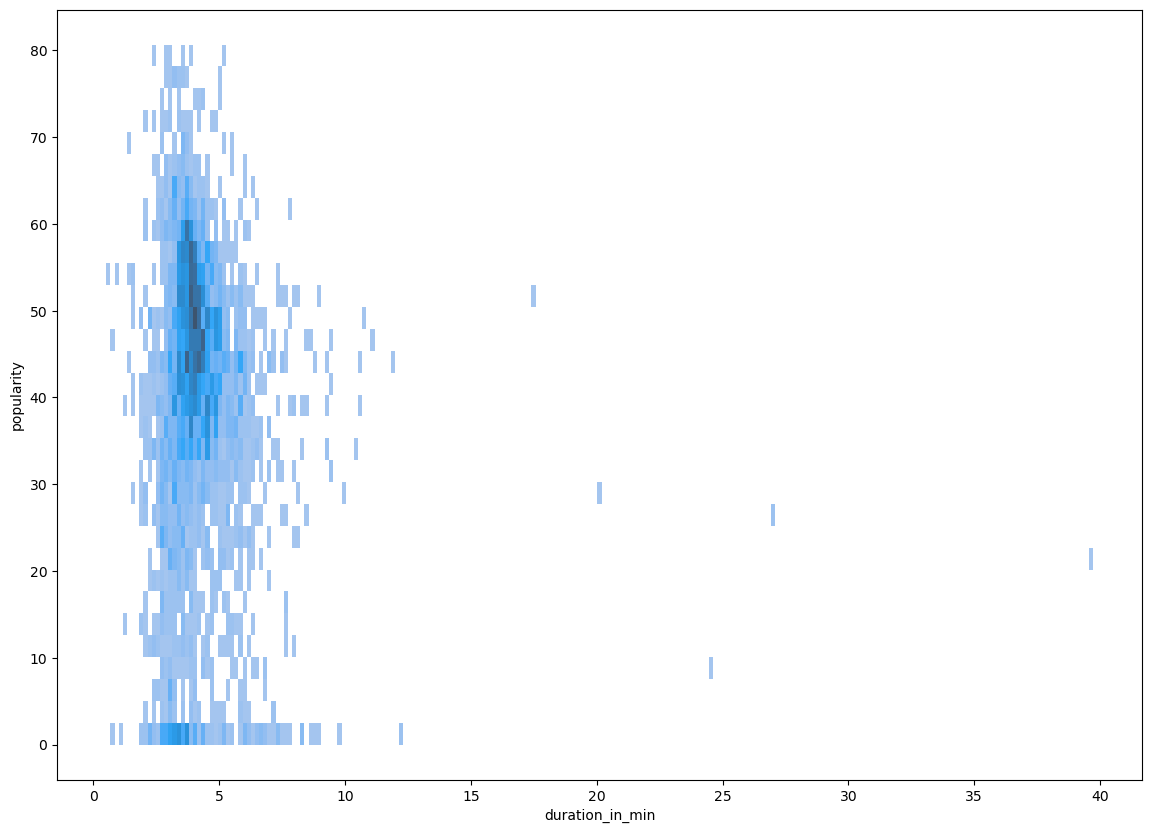

In [15]:
# A new column is added where the duration is in the units of minutes, instead of milliseconds
genre_data['duration_in_min'] = genre_data['duration_ms'] / 60000

# Set the width and height of the figure
plt.figure(figsize=(14,10))

# Histogram that depicts the relationship between duration in popularity
sns.histplot(genre_data, x="duration_in_min", y = "popularity")

**The densest set of points in the graph, represented by the dark blue, is where most of the genres lie with an average song length of approximately 4 minutes and a popularity value between 40 and 60. Looking at the average song lengths of the most popular genres, most of the genres with a popularity value greater than 60 lie left of the 5 minute increment. On the other hand, all of the genres past around 6 minutes have a popularity value below 60. This goes to show that shorter songs partially contribute to a greater popularity value.**

***

**To see what else could contribute to the popularity value of a genre, the most popular genres are analzyed by its acousticness, danceability, energy, instrumentalness, liveness, and valence through a grouped bar chart.**

In [16]:
# The top 15 genres with the largest 15 popularity values are extracted to a new data frame
top_15 = genre_data.nlargest(15, 'popularity')

In [17]:
# A bar plot with the top 15 genres by popularity and the 6 features along with their values are graphed
fig = px.bar(top_15, x='genres', y=['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence'], barmode='group')
fig.show()

**The grouped bar chart allows us to vizualize the audio features that may have contributed to the popularity of the top 15 genres. It can be observed that danceability and energy are consistently high throughout the most popular genres. This encourages further vizualization.**

***

**Upon noticing the pattern in the vizualization abvoe, to analyze potential correlation between energy and popularity & danceability and popularity, scatter plots with regression lines are vizualized below.**

<AxesSubplot:xlabel='energy', ylabel='popularity'>

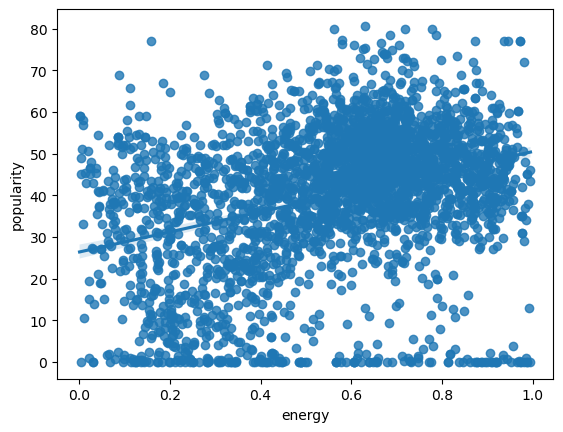

In [18]:
# Scatterplot with a regression line to assess the correlation between energy and popularity
sns.regplot(x=genre_data['energy'], y=genre_data['popularity'])

**The scatterplot allows us to vizualize the visible correlation through the data points as well as the regression line that has a positive slope, proving correlation. It can be observed that energy has a positive relationship with the popularity value. Energy is a sound feature that contributes to popularity.**

<AxesSubplot:xlabel='danceability', ylabel='popularity'>

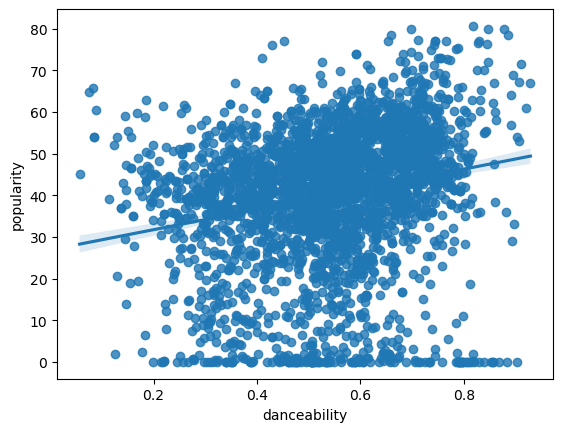

In [19]:
# Scatterplot with a regression line to assess the correlation between danceability and popularity
sns.regplot(x=genre_data['danceability'], y=genre_data['popularity'])

**The scatterplot allows us to vizualize the visible correlation through the data points as well as the regression line that has a positive slope, proving correlation. It can be observed that danceability has a positive relationship with the popularity value. Danceability is a sound feature that contributes to popularity.**

***

### Read Year Data

In [20]:
year_data.head()

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5

In [21]:
year_data.tail()

mode  year  acousticness  danceability    duration_ms    energy  \
95     1  2016      0.284171      0.600202  221396.510295  0.592855   
96     1  2017      0.286099      0.612217  211115.696787  0.590421   
97     1  2018      0.267633      0.663500  206001.007133  0.602435   
98     1  2019      0.278299      0.644814  201024.788096  0.593224   
99     1  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
95          0.093984  0.181170 -8.061056     0.104313  118.652630  0.431532   
96          0.097091  0.191713 -8.312630     0.110536  117.202740  0.416476   
97          0.054217  0.176326 -7.168785     0.127176  121.922308  0.447921   
98          0.077640  0.172616 -7.722192     0.121043  120.235644  0.458818   
99          0.016376  0.178535 -6.595067     0.141384  124.283129  0.501048   

    popularity  key  
95   59.647190    0  
96   63.263554    1  
97   63.296243    1  
98   65.256542    1  
99   64.301970    1

### Understanding the Data through Vizualization

**To understand how song duration has changed over the years, the histogram plot is visualized with the decade on the x axis and the duration in minutes on the y axis.**

In [22]:
# Add a column the data set that has the corresponding decade of the year
year_data['year_to_decade'] = year_data['year'].apply(decade_of_year)

# A new column is added where the duration is in the units of minutes, instead of milliseconds
year_data['duration_in_min'] = year_data['duration_ms'] / 60000

<AxesSubplot:xlabel='year_to_decade', ylabel='duration_in_min'>

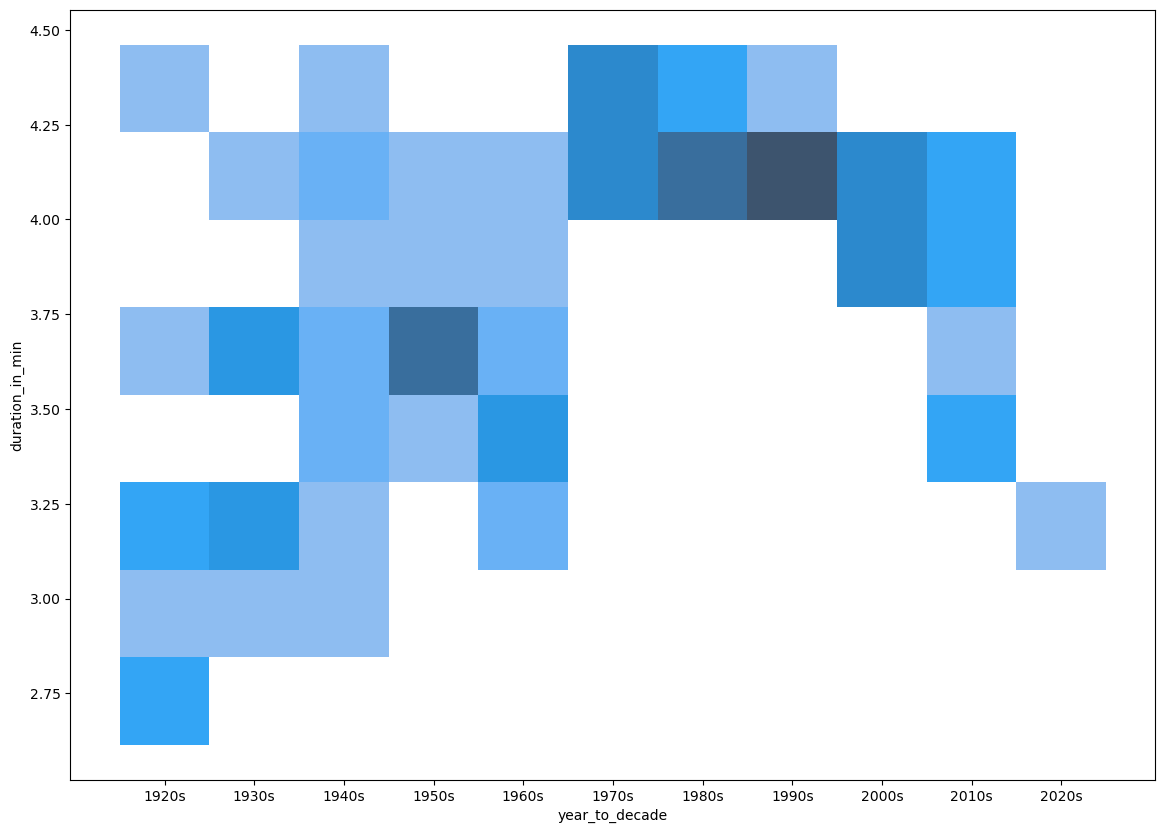

In [23]:
# Set the width and height of the figure
plt.figure(figsize=(14,10))

# Histogram plot showing shongs plotted based upon the decade and duration in minutes
sns.histplot(data=year_data, x="year_to_decade", y = "duration_in_min")

**Through the histogram plot, it can be observed that the variation in song durations drastically decreased. From the 1990s to the 2020s it is apparent that song duration in minutes also progressively decreased.**

***

**To interpret what most contributes to popularity out of the audio features over the years, the table is grouped by the decade, sorted by popularity, and the data is vizualized through a grouped bar chart that graphs the data in the order of popularity in ascending order.**

In [24]:
group = year_data.groupby(by = "year_to_decade")
group.first()

mode  year  acousticness  danceability    duration_ms  \
year_to_decade                                                          
1920s              1  1921      0.886896      0.418597  260537.166667   
1930s              1  1930      0.936715      0.518176  195150.285343   
1940s              1  1940      0.847644      0.521892  182227.944500   
1950s              1  1950      0.853941      0.504253  215073.125500   
1960s              1  1960      0.767181      0.486029  210209.683784   
1970s              1  1970      0.460057      0.506308  242852.151500   
1980s              1  1980      0.284955      0.556152  252835.533333   
1990s              1  1990      0.332870      0.535299  256451.403500   
2000s              1  2000      0.289323      0.590918  242724.642638   
2010s              1  2010      0.242687      0.572488  242811.804563   
2020s              1  2020      0.219931      0.692904  193728.397537   

                  energy  instrumentalness  liveness   loudness  speechiness  \
year_to_decade                                                                 
1920s           0.231815          0.344878  0.205710 -17.048667     0.073662   
1930s           0.333524          0.352206  0.221311 -12.869221     0.119910   
1940s           0.310893          0.316849  0.264335 -13.684048     0.242958   
1950s           0.314071          0.245001  0.216958 -13.863834     0.153453   
1960s           0.341142          0.176502  0.207864 -13.814103     0.065784   
1970s           0.495633          0.127567  0.212269 -11.772558     0.051681   
1980s           0.597777          0.128751  0.203754 -10.700942     0.059249   
1990s           0.571591          0.125826  0.190961 -11.327479     0.064345   
2000s           0.625413          0.101168  0.197686  -8.247766     0.089205   
2010s           0.681778          0.082981  0.199701  -6.909904     0.081031   
2020s           0.631232          0.016376  0.178535  -6.595067     0.141384   

                     tempo   valence  popularity  key  duration_in_min  
year_to_decade                                                          
1920s           101.531493  0.379327    0.653333    2         4.342286  
1930s           109.871194  0.616238    0.926715    2         3.252505  
1940s           108.449334  0.616709    0.930000    7         3.037132  
1950s           111.749725  0.551650    3.206500    7         3.584552  
1960s           112.561679  0.523932   19.783784    0         3.503495  
1970s           117.111610  0.572075   34.394500    2         4.047536  
1980s           122.985001  0.598058   36.206667    0         4.213926  
1990s           120.062734  0.526527   40.785500    7         4.274190  
2000s           118.999323  0.559475   46.684049    7         4.045411  
2010s           123.570215  0.520895   52.730159    0         4.046863  
2020s           124.283129  0.501048   64.301970    1         3.228807

In [25]:
sorted = group.first().sort_values(by = "popularity")
sorted

mode  year  acousticness  danceability    duration_ms  \
year_to_decade                                                          
1920s              1  1921      0.886896      0.418597  260537.166667   
1930s              1  1930      0.936715      0.518176  195150.285343   
1940s              1  1940      0.847644      0.521892  182227.944500   
1950s              1  1950      0.853941      0.504253  215073.125500   
1960s              1  1960      0.767181      0.486029  210209.683784   
1970s              1  1970      0.460057      0.506308  242852.151500   
1980s              1  1980      0.284955      0.556152  252835.533333   
1990s              1  1990      0.332870      0.535299  256451.403500   
2000s              1  2000      0.289323      0.590918  242724.642638   
2010s              1  2010      0.242687      0.572488  242811.804563   
2020s              1  2020      0.219931      0.692904  193728.397537   

                  energy  instrumentalness  liveness   loudness  speechiness  \
year_to_decade                                                                 
1920s           0.231815          0.344878  0.205710 -17.048667     0.073662   
1930s           0.333524          0.352206  0.221311 -12.869221     0.119910   
1940s           0.310893          0.316849  0.264335 -13.684048     0.242958   
1950s           0.314071          0.245001  0.216958 -13.863834     0.153453   
1960s           0.341142          0.176502  0.207864 -13.814103     0.065784   
1970s           0.495633          0.127567  0.212269 -11.772558     0.051681   
1980s           0.597777          0.128751  0.203754 -10.700942     0.059249   
1990s           0.571591          0.125826  0.190961 -11.327479     0.064345   
2000s           0.625413          0.101168  0.197686  -8.247766     0.089205   
2010s           0.681778          0.082981  0.199701  -6.909904     0.081031   
2020s           0.631232          0.016376  0.178535  -6.595067     0.141384   

                     tempo   valence  popularity  key  duration_in_min  
year_to_decade                                                          
1920s           101.531493  0.379327    0.653333    2         4.342286  
1930s           109.871194  0.616238    0.926715    2         3.252505  
1940s           108.449334  0.616709    0.930000    7         3.037132  
1950s           111.749725  0.551650    3.206500    7         3.584552  
1960s           112.561679  0.523932   19.783784    0         3.503495  
1970s           117.111610  0.572075   34.394500    2         4.047536  
1980s           122.985001  0.598058   36.206667    0         4.213926  
1990s           120.062734  0.526527   40.785500    7         4.274190  
2000s           118.999323  0.559475   46.684049    7         4.045411  
2010s           123.570215  0.520895   52.730159    0         4.046863  
2020s           124.283129  0.501048   64.301970    1         3.228807

In [26]:
fig = px.bar(sorted, y=['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence'], barmode='group')
fig.show()

**After the data is sorted, it can be observed that the popularity value in ascending order happens to be in  chronological order of the decades. This could be reasoned for through greater access to music with more streaming platforms and music progressively playing more of a role in society overtime. Furthermore, it is evident that the value of acousticness and its impact on the popularity value drastically decreased from the 1920s to the 1980s and has not been of great value recently. On the other hand, energy and danceability were always of relatively high value and pregressively increased in they way in which it impacted the popularity value in the recent decades.**

***

**To tie the duration of songs and the way in which it decreased over the decades along with the popularity value, the heatmap below is visualized.**

<AxesSubplot:xlabel='duration_in_min', ylabel='year_to_decade'>

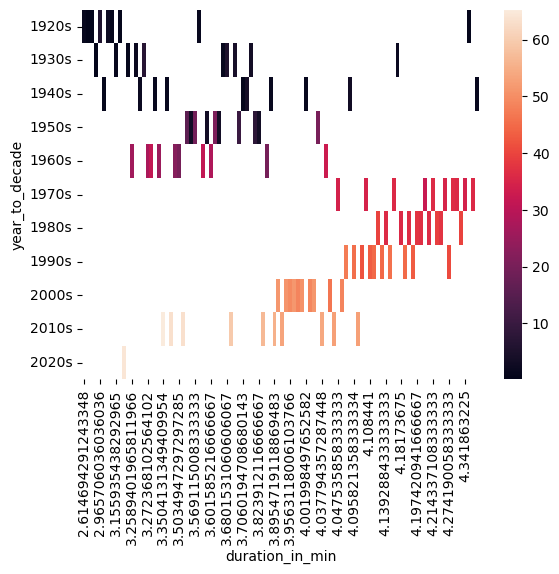

In [27]:
data_sns = year_data.pivot("year_to_decade", "duration_in_min", "popularity")
sns.heatmap(data_sns)

**The heatmap once again visualized the fact that songs got shorter over time and allows us to observe the greater popularity value (lighter tiles) that is repeatedly visible for songs between the 2 and 5 minute range. This is especially apparent for the recent decades (1970s and after).**

***

### Conclusion

**Through the multitude of visualizations of the Spotify dataset, we can draw several conclusions. It has been observed that explicit songs are likely to have a greater popularity score. Energy & danceability have a positive correlation with the popularity value. Acousticness was a sound feature that held value in the earlier decades, while the most recent decades continue to value energy and danceability. Over the decades, we can also conclude that songs have become significantly shorter.**